In [157]:
#Import packages 
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
conda install xldr
conda install openpyxl

In [124]:
#Download the excel file to your desktop and put the right path
df = pd.read_excel (r'C:\Users\Your_User\Desktop\File_name.xlsx')


In [126]:

df = df.rename(columns={'Unnamed: 1': 'Nome'})
df = df.rename(columns={'Unnamed: 2': 'Faltas'})
df = df.rename(columns={'Unnamed: 3': 'P1'})
df = df.rename(columns={'Unnamed: 4': 'P2'})
df = df.rename(columns={'Unnamed: 5': 'P3'})
df = df.rename(columns={'Unnamed: 6': 'Situação'})
df = df.rename(columns={'Unnamed: 7': 'NAF'})

df.drop(1)

,Engenharia de Software Desafio AUGUSTO LUZZI,Nome,Faltas,P1,P2,P3,Situação,NAF
0,Total de aulas no semestre: 60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Eduardo,8,35,63,61,NaN,NaN
3,2,Murilo,8,64,97,36,NaN,NaN
4,3,Guilherme,19,68,74,51,NaN,NaN
5,4,Flavia,23,66,98,62,NaN,NaN
6,5,Ruan,13,80,65,41,NaN,NaN
7,6,Arnando,23,83,68,77,NaN,NaN
8,7,Lucas,5,38,53,80,NaN,NaN
9,8,Fabio,10,53,96,89,NaN,NaN
10,9,Alisson,15,45,61,68,NaN,NaN


In [145]:
df_approved =  df.copy().drop(1)
df_approved["P1"] = pd.to_numeric(df_approved["P1"])
df_approved["P2"] = pd.to_numeric(df_approved["P2"])
df_approved["P3"] = pd.to_numeric(df_approved["P3"])


In [146]:
df_approved["Media Final"] = np.ceil((df_approved['P1'] + df_approved['P2'] + df_approved['P3'])/3)

   

In [148]:
df_approved["Media Final"] = pd.to_numeric(df_approved["Media Final"])

In [151]:
df_approved.loc[df_approved['Media Final'] <50, 'Situação'] =  'Reprovado por Nota'
df_approved.loc[df_approved['Media Final'] <70 , 'Situação'] =  'Exame Final'
df_approved.loc[df_approved['Media Final'] >=70, 'Situação'] =  'Aprovado'

df_approved.loc[df_approved['Media Final'] <50, 'NAF'] =  '0'
df_approved.loc[df_approved['Media Final'] >=70, 'NAF'] = '0'
df_approved.loc[df_approved['Media Final'] <70, 'NAF'] = np.ceil(100 - df_approved['Media Final'])

df_approved.loc[df_approved['Faltas'] >15, 'Situação'] =  'Reprovado por Falta'

In [152]:
df_approved

,Engenharia de Software Desafio AUGUSTO LUZZI,Nome,Faltas,P1,P2,P3,Situação,NAF,Media Final
0,Total de aulas no semestre: 60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Eduardo,8,35.0,63.0,61.0,Exame Final,47.0,53.0
3,2,Murilo,8,64.0,97.0,36.0,Exame Final,34.0,66.0
4,3,Guilherme,19,68.0,74.0,51.0,Reprovado por Falta,35.0,65.0
5,4,Flavia,23,66.0,98.0,62.0,Reprovado por Falta,0,76.0
6,5,Ruan,13,80.0,65.0,41.0,Exame Final,38.0,62.0
7,6,Arnando,23,83.0,68.0,77.0,Reprovado por Falta,0,76.0
8,7,Lucas,5,38.0,53.0,80.0,Exame Final,43.0,57.0
9,8,Fabio,10,53.0,96.0,89.0,Aprovado,0,80.0
10,9,Alisson,15,45.0,61.0,68.0,Exame Final,42.0,58.0


<AxesSubplot:xlabel='Situação', ylabel='Media Final'>

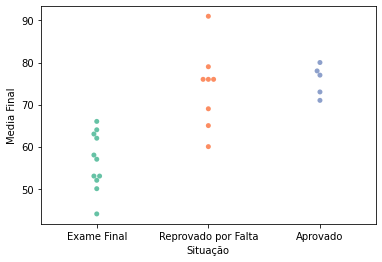

In [155]:
sns.swarmplot(x='Situação',y='Media Final',data=df_approved,palette='Set2')

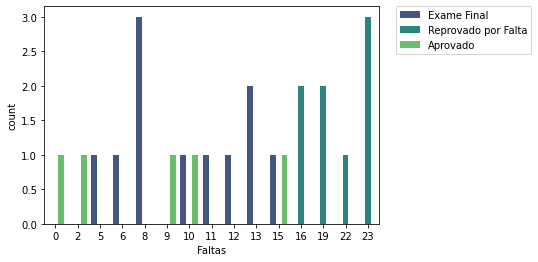

In [173]:
sns.countplot(x='Faltas',data=df_approved,hue='Situação',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)